# Folha_9

In [ ]:
#Exercicio 1
from scipy import array, arange
from pylab import plot, show, xlabel, ylabel, legend
from math import sin

def f(x,t):
    return -x**3 + sin(t)

def rk4(N): #metodo de Runge-Kutta de quarta ordem
    a=0.0 #inicio do intervalo
    b=10.0 #fim do intervalo
    h=(b-a)/N #cada passo
    
    tpoints=arange(a,b,h)
    xpoints=[]
    x=0.0
    for t in tpoints:
        
        xpoints.append(x)
        k1=h*f(x,t)
        k2=h*f(x+0.5*k1,t+0.5*h)
        k3=h*f(x+0.5*k2,t+0.5*h)
        k4=h*f(x+k3,t+h)
        x+=(k1+2*k2+2*k3+k4)/6  
    plot(tpoints,xpoints,label='N='+str(N))
    
rk4(10)
rk4(20)
rk4(50)
rk4(100)
legend()
xlabel('t')
ylabel('x(t)')
#subtittle ('Runge Kutta de ordem 4')
show()

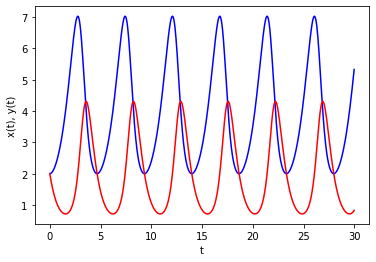

In [35]:
#Exercicio 2 - Equações de Lotka–Volterra
from scipy import array, arange
from pylab import plot, show, xlabel, ylabel

# Constants
alpha = 1
beta = 0.5
gamma = 0.5
delta = 2
x_0 = 2
y_0 = 2
t_initial = 0
t_max = 30
N = 1000
h = (t_max - t_initial) / N

def f_x(x, y):
    return alpha * x - beta * x * y


def f_y(x, y):
    return gamma * x * y - delta * y


def f(r, t):
    x = r[0]
    y = r[1]
    return array([ f_x(x, y), f_y(x, y) ] , float)


tpoints = arange(t_initial, t_max, h)
xpoints = []
ypoints = []

r = array([ x_0, y_0 ], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t+0.5*h)
    k3 = h * f(r + 0.5 * k2, t+0.5*h)
    k4 = h * f(r + k3, t+h)
    r += (k1 + 2 * k2 + 2 * k3 + k4)/6

plot(tpoints, xpoints, 'b')
plot(tpoints, ypoints, 'r')
xlabel('t')
ylabel('x(t), y(t)')
show()

In [37]:
#Exercicio 3 - Harmonic and anharmonic oscillators - O oscilador de van der Pol
from scipy import array, arange
from pylab import plot, show, xlabel, ylabel

# Constants
omega = 1
t_0 = 0
t_f = 50
x_0 = 1  # amplitude
v_0 = 0  # initial speed
N = 5000  # number of steps
h = (t_f - t_0) / N

def f_harmonic(r, t):
    x = r[0]
    v = r[1]
    return array([v, - omega ** 2 * x], float)

# harmonic oscillators
tpoints = arange(t_0, t_f, h)
def x_harmonic(amplitude):
    xpoints = []
    r = [amplitude, v_0]
    for t in tpoints:
        xpoints.append(r[0])
        k1 = h * f_harmonic(r, t)
        k2 = h * f_harmonic(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f_harmonic(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f_harmonic(r + k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return array(xpoints, float)


# anharmonic oscillators
def f_anharmonic(r, t):
    x = r[0]
    v = r[1]
    return array([v, - omega ** 2 * x ** 3], float)

def x_anharmonic(amplitude):
    xpoints = []
    vpoints = []
    r = array([amplitude, v_0], float)
    for t in tpoints:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1 = h * f_anharmonic(r, t)
        k2 = h * f_anharmonic(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f_anharmonic(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f_anharmonic(r + k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return array(xpoints, float), array(vpoints, float)

# # Plots of x(t)
plot(tpoints, x_anharmonic(x_0)[0])
plot(tpoints, x_anharmonic(2 * x_0)[0])
xlabel('t (s)')
ylabel('x (m)')
show()


# # Phase space plot
x, v = x_anharmonic(x_0)
plot(x, v)
xlabel('x')
ylabel('v')
show()

# van der Pol oscillator
# Constants
t_f = 20
N = 10000  # number of steps
h = (t_f - t_0) / N
def g(r, t, mu):
    x = r[0]
    v = r[1]
    return array([v, mu * (1 - x ** 2) * v - omega ** 2 * x], float)

tpoints = arange(t_0, t_f, h)

def x_van_der_pol(mu):
    xpoints = []
    vpoints = []
    r = array([x_0, v_0], float)
    for t in tpoints:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1 = h * g(r, t, mu)
        k2 = h * g(r + 0.5 * k1, t + 0.5 * h, mu)
        k3 = h * g(r + 0.5 * k2, t + 0.5 * h, mu)
        k4 = h * g(r + k3, t + h, mu)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return array(xpoints, float), array(vpoints, float)


mu1_x, mu1_v = x_van_der_pol(1)
mu2_x, mu2_v = x_van_der_pol(2)
mu3_x, mu3_v = x_van_der_pol(4)
plot(mu1_x, mu1_v, 'r')
plot(mu2_x, mu2_v, 'b')
plot(mu3_x, mu3_v, 'g')
xlabel('x')
ylabel('v')
show()

In [ ]:
#Exercicio 4
from __future__ import division, print_function
from os import sys
sys.path.append('cpresources')
from pylab import *
from math import sqrt

class rksolve:
	
	def __init__(self,f):
		
		self.f = f #self.array_decorator(f)
		
		self.initial_conditions = None
		self.solution = None
		
	def iterate(self,a,b,N=1000):
		
		#f = self.f
		r0 = array(self.initial_conditions,float96)
		
		h = (b-a)/N
		
		tpoints = arange(a,b,h)
		solution = empty(tpoints.shape + r0.shape,float)
		
		#r_points[0] = r0
		r = r0
		for i,t in enumerate(tpoints):
		    solution[i]=r
		    r += self.estimate_delta(r,t,h)
		
		self.h = h
		self.solution = solution
		self.t = tpoints
		
	def estimate_delta(self,r,t,h):
		
		f = self.f
		k1 = h*f(r,t)
		k2 = h*f(r+0.5*k1,t+0.5*h)
		k3 = h*f(r+0.5*k2,t+0.5*h)
		k4 = h*f(r+k3,t+h)
		return (k1+2*k2+2*k3+k4)/6

class rksolve_adaptive(rksolve):
	
	def iterate(self,a,b,delta=1):
		
		
		r0 = array(self.initial_conditions,float)
		
		h = (b-a)/10000
		solution = []
		time = []
		r = r0
		t = a
		
		solution.append(copy(r))
		time.append(t)
		
		ro = 1
		while t<b:	
			if ro<2:
				h = h*ro**(1/4)
			else:
				h*=2
			# estimating ro
			r1 = r + self.estimate_delta(r,t,h)
			r1 += self.estimate_delta(r1,t+h,h)			
			r2 = r + self.estimate_delta(r,t,2*h)
			difference = r1 - r2
			ro = 30*h*delta/sqrt(difference[0]**2 + difference[1]**2)
			
			if ro>1:
				t +=2*h
				r = r1
				solution.append(copy(r))
				time.append(t)
			
		
		self.h = h
		self.solution = array(solution)
		self.t = time


G = 6.67e-11
M = 1.9e30

def f(r,t):
	
	x,y,vx,vy = r
	
	Dx = vx
	Dy = vy
	
	R = sqrt(x**2 + y**2)
	
	Dvx = -G*M*x/R**3
	Dvy = -G*M*y/R**3
	
	return array([Dx,Dy,Dvx,Dvy],float)
	
prob = rksolve_adaptive(f)


R = 1.496e11
T = 3.156e7 
v = 2*pi*R/T
prob.initial_conditions = [4e12,0,0,500]

delta = 1e3/365/24/60/60
prob.iterate(0,T*50,delta=delta)


x = prob.solution[:,0]
y = prob.solution[:,1]

plot(x,y,'.')
show()

In [ ]:
#Exercicio 5
from scipy import array, arange
from pylab import plot, show, xlabel, ylabel

# Constants
h = 0.001
x_0 = 1
dxdt_0 = 0
t_0 = 0
t_f = 40

def f(r):
    x = r[0]
    v = r[1]
    return array([ v, v ** 2 - x -5 ], float)

r = array([x_0, dxdt_0] , float)
tpoints = arange(t_0, t_f, h)
xpoints = []
for t in tpoints:
    xpoints.append(r[0])
    r_mid = r + 0.5 * h * f(r)
    r += h * f(r_mid)


plot(tpoints, xpoints)
xlabel('t')
ylabel('x(t)')
show()

In [ ]:
#TPC
from scipy import array, arange, sqrt
from pylab import plot, show, xlabel, ylabel, title

# Declaração de constantes
posX_0 = 1.4710 * 10 ** 11 #Distancia da Terra no ponto de maior aproximação ao sol (periélio) 
dx_0 = 0 # distancia inicial orbitada pela terra
posY_0 = 0
ho=8760 #Horas por uma orbita
h = 1  # 1 hora (passo)
hy = h / ho  # 1 hora num ano (passo)
ha = 8760 * 60 * 60 # conversão de 1 ano em segundos (s)
v = 3.0287 * 10 ** 4 # Velocidade Linear (m/s) - movimento tangencial da terra relativamente ao Sol
dy_0 = v * ha  # distancia orbitada pela terra num ano (m/ano)
print("Dy (m) =", dy_0)
t_0 = 0 # tempo inicial (ano)
t_f = 3 # tempo maximo (ano)
Ga = 6.6738 * 10 ** -11 # Constante gravitacional de Newton em m^3 kg^−1 s^−2
G = Ga * (ha) ** 2 # Constante gravitacional de Newton num ano em m^3 kg^−1 s^−2
M = 1.9891 * 10 ** 30  # massa do sol em kg
m = 5.9722 * 10 ** 24  # massa da terra em kg

# função numerico de orbitas da terra
def f(r):
    posX = r[0]
    dx = r[1]
    posY = r[2]
    dy = r[3]
    dist = sqrt(posX ** 2 + posY ** 2)  # r = RaizQ(px2 + y2)
    return array([ dx, -G * M * posX / dist ** 3, dy, -G * M * posY / dist ** 3 ], float) 


# Calculo numerico de uma ou varios orbitas da terra
tpoints = arange(t_0, t_f, hy) #definição da serie de valores com "step" h
#Declaração de array´s
xpoints = []
ypoints = []
potencial_E = []
cinetica_E = []
total_EE = []
r = array([posX_0, dx_0, posY_0, dy_0], float)
#print("-----------------")
#print("Energia (r):",r)
#print("Energia f(r):",f(r))
f_mid = 0.5 * hy * f(r)
dx_mid = r[1] + f_mid[1]
dy_mid = r[3] + f_mid[3]
for t in tpoints:
    xpoints.append(r[0]/10**10) #calculo da posição x no passo actual e adiciona na array xpoints
    ypoints.append(r[2]/10**10) #calculo da posição y no passo actual e adiciona na array ypoints
    potencial_E.append((-Ga * M * m / sqrt(r[0] ** 2 + r[2] ** 2))) #calculo da energia potencial no passo actual e adiciona ao mesmo na array potencial_E
    cinetica_E.append((0.5 * m * (r[1] ** 2 + r[3] ** 2) / (ha) ** 2)) #calculo da energia cinetica no passo actual e adiciona esta mesmo na array cinetica_E
    total_EE.append((-Ga * M * m / sqrt(r[0] ** 2 + r[2] ** 2))+(0.5 * m * (r[1] ** 2 + r[3] ** 2) / (ha) ** 2)) #calculo da energia Total no passo actual e adiciona esta mesmo na array total_E
    r[0] += hy * dx_mid #passo x (distancia atcual+função)
    r[2] += hy * dy_mid
    k = hy * f(r)  #passo x função
    r[1] = dx_mid + 0.5 * k[1] #substituição do valor antigo pelo valor da distancia atual + metada de K
    r[3] = dy_mid + 0.5 * k[3]
    f_mid = 0.5 * hy * f(r)
    dx_mid += k[1]  #substituição do valor antigo pelo actual
    dy_mid += k[3]


mxx = max(xpoints) #retorno o valor maximo da posição
mx_posx = xpoints.index(mxx) #retorno o valor indice quando a posição é maximo
ymxx = ypoints[mn_posx]
mnx = min(xpoints) #retorno o valor minimo da posição
mn_posx = xpoints.index(mnx) #retorno o valor indice quando a posição é minimo

mxy = max(ypoints) #retorno o valor maximo da posição
mx_posy = ypoints.index(mxy) #retorno o valor indice quando a posição é maximo
mny = min(ypoints) #retorno o valor minimo da posição
mn_posy = ypoints.index(mny) #retorno o valor indice quando a posição é minimo

mxxEPG = potencial_E[mx_posx] #retorno o valor tempo quando a posição é maximo
mnxEPG = potencial_E[mn_posx] #retorno o valor tempo quando a posição é minima
mxyEPG = potencial_E[mx_posy] #retorno o valor tempo quando a posição é maximo
mnyEPG = potencial_E[mn_posy] #retorno o valor tempo quando a posição é minima

mxxEk = cinetica_E[mx_posx] #retorno o valor tempo quando a posição é maximo
mnxEk = cinetica_E[mn_posx] #retorno o valor tempo quando a posição é minima
mxyEk = cinetica_E[mx_posy] #retorno o valor tempo quando a posição é maximo
mnyEk = cinetica_E[mn_posy] #retorno o valor tempo quando a posição é minima
   
    
# Representação grafica de uma ou varias orbitas da terra
plot(xpoints, ypoints, label="Orbitas da Terra")
title("Translação da Terra",fontsize=14)
xlabel('x (10^10 m)')
ylabel('y (10^10 m)')
show()


# Representação grafica das energias(Cinética, Potencial Gravitacional e Total) de uma ou varias orbitas da terra
total_E = array(cinetica_E, float) + array(potencial_E, float)
plot(tpoints, cinetica_E, 'r')
plot(tpoints, potencial_E, 'b')
plot(tpoints, total_EE, 'g')
title("Energias de Translação",fontsize=14)
xlabel('t (anos)')
ylabel('Energias (J)')
show()

# Representação grafica da energia Total de uma ou varias orbitas da terra
total_E = array(cinetica_E, float) + array(potencial_E, float)
plot(tpoints, total_EE, 'g')
title("Energia Total de Translação",fontsize=14)
xlabel('t (anos)')
ylabel('Energias (J)')
show()

# Representação grafica da energia Cinética de uma ou varias orbitas da terra
plot(tpoints, cinetica_E, 'r')
title("Energia Cinética de Translação",fontsize=14)
xlabel('t (anos)')
ylabel('Energias (J)')
show()


# Representação grafica da energia potencial gravítica de uma ou varias orbitas da terra
plot(tpoints, potencial_E, 'b')
title("Energia Potencial Gravítica de Translação",fontsize=14)
xlabel('t (anos)')
ylabel('Energias (J)')
show()

print("-----------------")
print("Posição de x maximo (10^10 m): ", mxx)
print("Posição de y quando x maximo (10^10 m): ", ymxx)
print("Energia Potencial no ponto de x maximo (j): ", mxxEPG)
print("Energia Cinetica no ponto de x maximo (j): ", mxxEk)
print("Posição de x minimo (10^10 m): ", mnx)
print("Energia Potencial no ponto de x minimo (j): ", mnxEPG)
print("Energia Cinetica no ponto de x minimo (j): ", mnxEk)
print("-----------------")
print("-----------------")
print("Posição de y maximo (10^10 m): ", mxy)
print("Energia Potencial no ponto de y maximo (j): ", mxyEPG)
print("Energia Cinetica no ponto de y maximo (j): ", mxyEk)
print("Posição de y minimo (10^10 m): ", mny)
print("Energia Potencial no ponto de y minimo (j): ", mnyEPG)
print("Energia Cinetica no ponto de y minimo (j): ", mnyEk)
print("-----------------")

# Folha_10

In [ ]:
#Exercicio 1
from numpy import sqrt, zeros
from pylab import imshow, show, gray

# Constants
epsilon_0 = 1
L = 1  # in meters
N = 100  # number of grid points on a side
a = L / N  # grid point spacing
rho_0 = 1 / sqrt(8.8541 * 10 ** -12)  # charge density scaled by sqrt(epsilon_0) (in SI) so epsilon_0 = 1
delta = 10 ** -6

def rho(i, j):
    if 20 < i < 40 and 60 < j < 80:
        return rho_0
    elif 60 < i < 80 and 20 < j < 40:
        return -rho_0
    else:
        return 0

# test = zeros([N+1,N+1], float)
# for i in range(N):
#     for j in range(N):
#         test[i,j] = rho(i,j)
# imshow(test)
# gray()
# show()

def larger(a, b):
    if a >= b:
        return a
    else:
        return b

# Solve poisson's equation using Gauss-Seidel relaxation method
max_diff = 2 * delta
# initialize array
phi = zeros([N + 1, N + 1], float)

while max_diff > delta:
    #  reset max difference after each complete update of grid
    max_diff = 0.0
    for i in range(N + 1):
        for j in range(N + 1):
            if not i == 0 and not j == 0 and not i == N and not j == N:
                old_phi = phi[i,j]
                new_phi = (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1] \
                             + a ** 2 / 4 * rho(i, j)) / 4
                phi[i, j] = new_phi

                # note the largest change in phi in this update of the grid
                max_diff = larger(max_diff, abs(new_phi - old_phi))
    print("max_diff = ", max_diff)


imshow(phi)
gray()
show()

max_diff =  4.200856059876267
max_diff =  4.200855876890715
max_diff =  4.200853621014794
max_diff =  4.200835565341535
max_diff =  4.200729969594015
max_diff =  4.200248392684774
max_diff =  4.198463309665037
max_diff =  4.194487283432462
max_diff =  4.188539201575587
max_diff =  4.181249472481085
max_diff =  4.170035569567517
max_diff =  4.154354364062698
max_diff =  4.134109729649694
max_diff =  4.1144819574834415
max_diff =  4.092965886290372
max_diff =  4.068423361057967
max_diff =  4.041064866967048
max_diff =  4.011158715474139
max_diff =  3.9790017937687026
max_diff =  3.9448989207575664
max_diff =  3.9091486700504703
max_diff =  3.8720341245978744
max_diff =  3.833817360787563
max_diff =  3.794736664200599
max_diff =  3.7550056614605865
max_diff =  3.714813729343632
max_diff =  3.674327202712135
max_diff =  3.633691037363448
max_diff =  3.594895461052843
max_diff =  3.556801708775552
max_diff =  3.5187046420407455
max_diff =  3.4806864249459153
max_diff =  3.4428189981476436
m

max_diff =  0.7909243710613509
max_diff =  0.78817476827885
max_diff =  0.7854412846467653
max_diff =  0.7827237570885472
max_diff =  0.780022024753805
max_diff =  0.7773359289819837
max_diff =  0.7746653132684855
max_diff =  0.7720100232293703
max_diff =  0.7693699065681585
max_diff =  0.7667448130424077
max_diff =  0.764134594431539
max_diff =  0.7615391045044362
max_diff =  0.7589581989885232
max_diff =  0.7563917355388412
max_diff =  0.7538395737074666
max_diff =  0.7513015749144074
max_diff =  0.748777602417988
max_diff =  0.7462675212861427
max_diff =  0.7437711983686768
max_diff =  0.7412885022691853
max_diff =  0.738819303317996
max_diff =  0.7363634735455662
max_diff =  0.7339208866562785
max_diff =  0.7314914180025198
max_diff =  0.7290749445593292
max_diff =  0.7266713448998416
max_diff =  0.7242804991705043
max_diff =  0.7219022890670885
max_diff =  0.7195365978111568
max_diff =  0.7171833101266429
max_diff =  0.7148423122180247
max_diff =  0.7125134917458809
max_diff =  0.

max_diff =  0.36695084388463783
max_diff =  0.36598837102985726
max_diff =  0.365028764515273
max_diff =  0.3640720126643373
max_diff =  0.3631181038770137
max_diff =  0.3621670266292085
max_diff =  0.36121876947197507
max_diff =  0.3602733210309452
max_diff =  0.35933067000541996
max_diff =  0.3583908051676872
max_diff =  0.3574537153623396
max_diff =  0.3565193895055927
max_diff =  0.3555878165852846
max_diff =  0.35465898565826137
max_diff =  0.3537328858519686
max_diff =  0.3528095063626324
max_diff =  0.35188883645457736
max_diff =  0.350970865459999
max_diff =  0.3500555827777134
max_diff =  0.3491429778736119
max_diff =  0.34823304027884205
max_diff =  0.3473257595899213
max_diff =  0.34642112546771386
max_diff =  0.34551912763731707
max_diff =  0.3446197558870381
max_diff =  0.3437230000681666
max_diff =  0.3428288500936105
max_diff =  0.3419372959388056
max_diff =  0.3410483276394416
max_diff =  0.34016193529214434
max_diff =  0.339278109053339
max_diff =  0.33839683913879526


max_diff =  0.18904449797594225
max_diff =  0.18857137165150561
max_diff =  0.18809946547457912
max_diff =  0.18762877601398031
max_diff =  0.18715929985000912
max_diff =  0.1866910335747889
max_diff =  0.18622397379272115
max_diff =  0.1857581171198035
max_diff =  0.18529346018374326
max_diff =  0.18482999962384383
max_diff =  0.18436773209111834
max_diff =  0.1839066542480623
max_diff =  0.18344676276876726
max_diff =  0.1829880543385798
max_diff =  0.18253052565455619
max_diff =  0.18207417342478038
max_diff =  0.181618994368705
max_diff =  0.18116498521692392
max_diff =  0.1807121427112861
max_diff =  0.1802604636045544
max_diff =  0.1798099446608603
max_diff =  0.17936058265513566
max_diff =  0.17891237437345353
max_diff =  0.17846531661234621
max_diff =  0.17801940617937362
max_diff =  0.17757463989312328
max_diff =  0.1771310145827556
max_diff =  0.17668852708789018
max_diff =  0.17624717425940162
max_diff =  0.17580695295794158
max_diff =  0.17536786005507565
max_diff =  0.1749

max_diff =  0.09896228373509075
max_diff =  0.0987172829480869
max_diff =  0.09847289360152445
max_diff =  0.0982291141335736
max_diff =  0.09798594298604257
max_diff =  0.0977433786056281
max_diff =  0.09750141944300594
max_diff =  0.09726006395294462
max_diff =  0.09701931059453273
max_diff =  0.09677915783106528
max_diff =  0.09653960413027107
max_diff =  0.09630064796340321
max_diff =  0.09606228780637593
max_diff =  0.09582452213930992
max_diff =  0.09558734944619118
max_diff =  0.09535076821498478
max_diff =  0.09511477693843062
max_diff =  0.09487937411245184
max_diff =  0.09464455823751905
max_diff =  0.09441032781830927
max_diff =  0.09417668136359225
max_diff =  0.09394361738554835
max_diff =  0.09371113440101908
max_diff =  0.09347923093059762
max_diff =  0.0932479054988562
max_diff =  0.09301715663457344
max_diff =  0.09278698287027964
max_diff =  0.09255738274237046
max_diff =  0.09232835479156165
max_diff =  0.09209989756232062
max_diff =  0.09187200960286646
max_diff =  

max_diff =  0.05175197834159917
max_diff =  0.05162423711112751
max_diff =  0.051496811916649676
max_diff =  0.051369701971680115
max_diff =  0.051242906490870155
max_diff =  0.05111642469114486
max_diff =  0.050990255791589334
max_diff =  0.050864399012766626
max_diff =  0.050738853578081944
max_diff =  0.05061361871173631
max_diff =  0.050488693641227655
max_diff =  0.050364077594736045
max_diff =  0.05023976980351108
max_diff =  0.05011576949971186
max_diff =  0.04999207591833965
max_diff =  0.04986868829587365
max_diff =  0.04974560587072574
max_diff =  0.04962282788358152
max_diff =  0.04950035357626348
max_diff =  0.04937818219354995
max_diff =  0.04925631298169719
max_diff =  0.049134745188325724
max_diff =  0.04901347806355716
max_diff =  0.04889251085955948
max_diff =  0.048771842829978596
max_diff =  0.04865147323027941
max_diff =  0.04853140131854161
max_diff =  0.04841162635364071
max_diff =  0.04829214759729439
max_diff =  0.04817296431247087
max_diff =  0.0480540757641847

max_diff =  0.027634090502488107
max_diff =  0.027565938868747253
max_diff =  0.027497955434114374
max_diff =  0.027430139782495644
max_diff =  0.027362491498934105
max_diff =  0.02729501016949598
max_diff =  0.02722769538161174
max_diff =  0.027160546722939216
max_diff =  0.027093563783296304
max_diff =  0.027026746152273518
max_diff =  0.026960093421507736
max_diff =  0.026893605183090585
max_diff =  0.026827281030364247
max_diff =  0.02676112055746671
max_diff =  0.02669512335978652
max_diff =  0.026629289033394343
max_diff =  0.026563617175838772
max_diff =  0.026498107385350522
max_diff =  0.02643275926118349
max_diff =  0.026367572403728445
max_diff =  0.026302546413830896
max_diff =  0.026237680894269033
max_diff =  0.026172975448162106
max_diff =  0.026108429679652545
max_diff =  0.026044043193905964
max_diff =  0.02597981559733853
max_diff =  0.02591574649704853
max_diff =  0.02585183550104375
max_diff =  0.02578808221858253
max_diff =  0.02572448625994639
max_diff =  0.025661

max_diff =  0.01479705463520986
max_diff =  0.014760571942474598
max_diff =  0.014724179220706901
max_diff =  0.014687876248103748
max_diff =  0.014651662802975807
max_diff =  0.014615538664543237
max_diff =  0.014579503612594635
max_diff =  0.01454355742680491
max_diff =  0.01450769988821321
max_diff =  0.014471930778199749
max_diff =  0.014436249878144736
max_diff =  0.014400656970678938
max_diff =  0.014365151838660495
max_diff =  0.014329734265288607
max_diff =  0.01429440403467197
max_diff =  0.01425916093126034
max_diff =  0.014224004740071905
max_diff =  0.014188935246465917
max_diff =  0.014153952236824807
max_diff =  0.014119055497417321
max_diff =  0.014084244815421698
max_diff =  0.014049519978811986
max_diff =  0.014014880775448546
max_diff =  0.013980326993987546
max_diff =  0.013945858423767277
max_diff =  0.013911474854694461
max_diff =  0.013877176076675823
max_diff =  0.013842961880641269
max_diff =  0.013808832058202825
max_diff =  0.013774786400517769
max_diff =  0.0

max_diff =  0.007943699251654834
max_diff =  0.007924115565174361
max_diff =  0.00790458016251705
max_diff =  0.007885092924766468
max_diff =  0.007865653733006184
max_diff =  0.007846262468774512
max_diff =  0.007826919013723455
max_diff =  0.0078076232501871345
max_diff =  0.007788375060499675
max_diff =  0.007769174327336259
max_diff =  0.007750020933599444
max_diff =  0.007730914762419161
max_diff =  0.007711855697834835
max_diff =  0.007692843623203771
max_diff =  0.007673878422679081
max_diff =  0.007654959980982312
max_diff =  0.0076360881826076366
max_diff =  0.007617262912390288
max_diff =  0.007598484055961308
max_diff =  0.007579751498496989
max_diff =  0.007561065125969435
max_diff =  0.007542424824464433
max_diff =  0.00752383048052252
max_diff =  0.007505281980570544
max_diff =  0.007486779211717476
max_diff =  0.007468322061185972
max_diff =  0.0074499104163123775
max_diff =  0.007431544165228843
max_diff =  0.0074132231956127725
max_diff =  0.007394947395937379
max_diff

max_diff =  0.004275211440699422
max_diff =  0.004264672050567242
max_diff =  0.004254158643220762
max_diff =  0.004243671154540607
max_diff =  0.00423320952074846
max_diff =  0.004222773678179692
max_diff =  0.004212363562942301
max_diff =  0.004201979111712717
max_diff =  0.004191620261508433
max_diff =  0.0041812869487785065
max_diff =  0.004170979110767803
max_diff =  0.004160696684721188
max_diff =  0.004150439607997214
max_diff =  0.00414020781806812
max_diff =  0.004130001252406146
max_diff =  0.004119819848938278
max_diff =  0.0041096635459325626
max_diff =  0.004099532281088614
max_diff =  0.004089425992560791
max_diff =  0.004079344619299263
max_diff =  0.00406928809945839
max_diff =  0.004059256372102027
max_diff =  0.004049249375839281
max_diff =  0.004039267049620321
max_diff =  0.004029309332963749
max_diff =  0.004019376164819732
max_diff =  0.004009467484934248
max_diff =  0.0039995832328258984
max_diff =  0.003989723348240659
max_diff =  0.0039798877713792535
max_diff 

max_diff =  0.0023065860364113178
max_diff =  0.002300899828810543
max_diff =  0.002295227639024233
max_diff =  0.0022895694324915894
max_diff =  0.0022839251749928735
max_diff =  0.002278294831739913
max_diff =  0.0022726783685129703
max_diff =  0.0022670757512059936
max_diff =  0.002261486945485558
max_diff =  0.0022559119175866726
max_diff =  0.002250350633516973
max_diff =  0.0022448030591704082
max_diff =  0.002239269160781987
max_diff =  0.0022337489049277792
max_diff =  0.0022282422575017335
max_diff =  0.0022227491853072934
max_diff =  0.0022172696549205284
max_diff =  0.0022118036328038215
max_diff =  0.0022063510855332424
max_diff =  0.002200911980139608
max_diff =  0.0021954862833126754
max_diff =  0.002190073962196948
max_diff =  0.002184674983482182
max_diff =  0.0021792893146539427
max_diff =  0.002173916922515673
max_diff =  0.002168557774666624
max_diff =  0.0021632118383649868
max_diff =  0.0021578790810963255
max_diff =  0.0021525594700051442
max_diff =  0.00214725297

max_diff =  0.001263034574435551
max_diff =  0.0012599209472909934
max_diff =  0.001256814996168032
max_diff =  0.0012537167016262174
max_diff =  0.0012506260451345952
max_diff =  0.0012475430075937766
max_diff =  0.001244467570472807
max_diff =  0.0012413997147859845
max_diff =  0.0012383394221160415
max_diff =  0.0012352866735909629
max_diff =  0.0012322414509071677
max_diff =  0.0012292037350789542
max_diff =  0.001226173508030115
max_diff =  0.001223150751002322
max_diff =  0.0012201354456919944
max_diff =  0.0012171275737955511
max_diff =  0.0012141271167820378
max_diff =  0.001211134056688934
max_diff =  0.0012081483750989719
max_diff =  0.001205170053594884
max_diff =  0.0012021990744415234
max_diff =  0.0011992354193353094
max_diff =  0.0011962790702000348
max_diff =  0.001193330009073179
max_diff =  0.0011903882181059089
max_diff =  0.0011874536789946433
max_diff =  0.001184526374345296
max_diff =  0.0011816062859679732
max_diff =  0.0011786933963549018
max_diff =  0.001175787

max_diff =  0.000689905366016319
max_diff =  0.000688204616949406
max_diff =  0.0006865080604256946
max_diff =  0.000684815686327056
max_diff =  0.0006831274841943014
max_diff =  0.0006814434440229888
max_diff =  0.0006797635550128689
max_diff =  0.0006780878075005603
max_diff =  0.0006764161909131872
max_diff =  0.0006747486953599946
max_diff =  0.0006730853102681067
max_diff =  0.0006714260257467686
max_diff =  0.0006697708319052254
max_diff =  0.0006681197181706011
max_diff =  0.0006664726751068883
max_diff =  0.0006648296920275243
max_diff =  0.0006631907593828146
max_diff =  0.0006615558670546307
max_diff =  0.0006599250048111571
max_diff =  0.0006582981631026996
max_diff =  0.0006566753321521901
max_diff =  0.0006550565012730658
max_diff =  0.0006534416614840666
max_diff =  0.0006518308024396902
max_diff =  0.0006502239144765554
max_diff =  0.000648620987931281
max_diff =  0.0006470220129131121
max_diff =  0.0006454269795312939
max_diff =  0.000643835878236132
max_diff =  0.00064

max_diff =  0.0003805851184779385
max_diff =  0.00037964690352509933
max_diff =  0.00037871100164466043
max_diff =  0.0003777774068112194
max_diff =  0.0003768461133404344
max_diff =  0.00037591711600271083
max_diff =  0.00037499040854527266
max_diff =  0.00037406598551115167
max_diff =  0.00037314384178444016
max_diff =  0.0003722239709986752
max_diff =  0.00037130636803794914
max_diff =  0.00037039102687685954
max_diff =  0.0003694779423994987
max_diff =  0.00036856710880783794
max_diff =  0.000367658520644909
max_diff =  0.00036675217234005686
max_diff =  0.00036584805832262646
max_diff =  0.00036494617302196275
max_diff =  0.0003640465112084712
max_diff =  0.00036314906719780993
max_diff =  0.0003622538354193239
max_diff =  0.00036136081075710536
max_diff =  0.0003604699875268125
max_diff =  0.0003595813601577902
max_diff =  0.00035869492364781763
max_diff =  0.0003578106723125529
max_diff =  0.00035692860069502785
max_diff =  0.00035604870379302156
max_diff =  0.000355170975694818

max_diff =  0.00021098814045217296
max_diff =  0.00021046801441571006
max_diff =  0.00020994917076677666
max_diff =  0.00020943160609476763
max_diff =  0.0002089153174438252
max_diff =  0.00020840030128965736
max_diff =  0.0002078865550174669
max_diff =  0.00020737407521664863
max_diff =  0.00020686285847659747
max_diff =  0.00020635290229620296
max_diff =  0.0002058442030374863
max_diff =  0.00020533675797196338
max_diff =  0.00020483056380271591
max_diff =  0.00020432561757388612
max_diff =  0.0002038219159885557
max_diff =  0.00020331945620455372
max_diff =  0.0002028182350386487
max_diff =  0.0002023182495349829
max_diff =  0.00020181949662401166
max_diff =  0.00020132197312250355
max_diff =  0.00020082567607460078
max_diff =  0.0002003306026381324
max_diff =  0.00019983674962986697
max_diff =  0.00019934411398025986
max_diff =  0.0001988526927334533
max_diff =  0.00019836248304727633
max_diff =  0.00019787348196587118
max_diff =  0.00019738568596494588
max_diff =  0.00019689909277

max_diff =  0.00011696725937326846
max_diff =  0.0001166789129456447
max_diff =  0.00011639127717444353
max_diff =  0.00011610435046804923
max_diff =  0.00011581813123484608
max_diff =  0.00011553261742847099
max_diff =  0.0001152478076846819
max_diff =  0.00011496369984342891
max_diff =  0.00011468029254046996
max_diff =  0.00011439758384312881
max_diff =  0.0001141155720461029
max_diff =  0.00011383425544408965
max_diff =  0.0001135536323317865
max_diff =  0.00011327370111757773
max_diff =  0.00011299445986878709
max_diff =  0.00011271590710748569
max_diff =  0.00011243804078731046
max_diff =  0.000112160859771393
max_diff =  0.00011188436189968343
max_diff =  0.00011160854569425283
max_diff =  0.0001113334093361118
max_diff =  0.0001110589514610183
max_diff =  0.00011078517002260924
max_diff =  0.00011051206342926889
max_diff =  0.00011023963020306837
max_diff =  0.00010996786863870511
max_diff =  0.00010969677680350287
max_diff =  0.00010942635344690643
max_diff =  0.00010915659663

max_diff =  6.452480681673478e-05
max_diff =  6.436574085455504e-05
max_diff =  6.42070669982786e-05
max_diff =  6.404878445209761e-05
max_diff =  6.389089207914367e-05
max_diff =  6.373338885623525e-05
max_diff =  6.357627398756449e-05
max_diff =  6.341954633626301e-05
max_diff =  6.326320522020978e-05
max_diff =  6.310724927516276e-05
max_diff =  6.295167793268774e-05
max_diff =  6.279649005591637e-05
max_diff =  6.264168484904076e-05
max_diff =  6.24872610615057e-05
max_diff =  6.233321812487702e-05
max_diff =  6.217955501597316e-05
max_diff =  6.202627048423892e-05
max_diff =  6.18733639612401e-05
max_diff =  6.172083442379517e-05
max_diff =  6.156868073503574e-05
max_diff =  6.141690244021447e-05
max_diff =  6.126549806140247e-05
max_diff =  6.111446680279187e-05
max_diff =  6.096380798226164e-05
max_diff =  6.081352069031709e-05
max_diff =  6.066360379008984e-05
max_diff =  6.0514056599458854e-05
max_diff =  6.036487775418209e-05
max_diff =  6.021606702688587e-05
max_diff =  6.00

max_diff =  3.577115762709582e-05
max_diff =  3.568297483980132e-05
max_diff =  3.559500964911422e-05
max_diff =  3.5507261145539815e-05
max_diff =  3.5419728988017596e-05
max_diff =  3.533241260811337e-05
max_diff =  3.5245311551079794e-05
max_diff =  3.5158425134795834e-05
max_diff =  3.507175290451414e-05
max_diff =  3.4985294405487366e-05
max_diff =  3.489904906928132e-05
max_diff =  3.4813016100088134e-05
max_diff =  3.472719561159465e-05
max_diff =  3.4641586466932495e-05
max_diff =  3.455618832504115e-05
max_diff =  3.447100073117326e-05
max_diff =  3.438602311689465e-05
max_diff =  3.430125514114479e-05
max_diff =  3.4216695894428995e-05
max_diff =  3.413234537674725e-05
max_diff =  3.404820256491803e-05
max_diff =  3.396426745894132e-05
max_diff =  3.3880538921948755e-05
max_diff =  3.379701684025349e-05
max_diff =  3.371370075910818e-05
max_diff =  3.3630590223765466e-05
max_diff =  3.354768443841749e-05
max_diff =  3.346498306200374e-05
max_diff =  3.3382485412403184e-05
max

In [34]:
#Exercicio 2 - Equação de laplace - Método da relaxação para 3 dimensões
from numpy import empty,zeros,max
from pylab import imshow,gray,show
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1,M+1],float)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            for k in range(M+1):
                if i==0 or i==M or j==0 or j==M or k==0 or k==M:
                    phiprime[i,j,k] = phi[i,j,k]
                else:
                    phiprime[i,j,k] = (phi[i+1,j,k] + phi[i-1,j,k] + phi[i,j+1,k] + phi[i,j-1,k] + phi[i,j,k+1] + phi[i,j,k-1])/6

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

# Make a plot
#imshow(phi)
#gray()
#show()

#Make plot 3D
X, Y, Z = np.meshgrid(phi[0], phi[1], phi[2])
Print(phi)

fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

KeyboardInterrupt: 

501
501


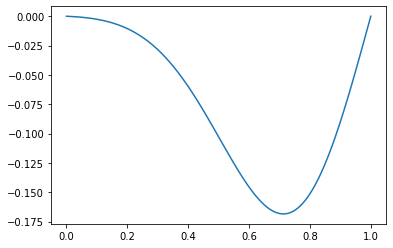

In [31]:
#Exercicio 3
from __future__ import division, print_function
from pylab import *

h = 2e-6 #s
L = 1 #m
v = 100 #ms−1

d = 0.1 #m
C = 1 #ms-1
sigma = 0.3 #m
N = 500 # grid spacings
a = L/N

def phi0(x):
	return C * x*(L-x)/L**2*exp(- (x-d)**2/2/sigma**2)

fi = zeros(N+1,float)
print (len(fi))
x = linspace(0,L,N+1)
phi = phi0(x)
print (len (phi))
#t = 0
#t_end = 50e-3/100

def iterate(fi,phi,dt=50e-3):
	iterations = int(dt/h)
	for i in range(iterations):
		fi[1:N] += h*phi[1:N]
		phi[1:N] += h*v**2/a**2*(fi[2:N+1] + fi[0:N-1] - 2*fi[1:N])
		#t +=h
	return fi,phi
#iterations = int(50e-3/h)

fi,phi = iterate(fi,phi)
#print (fi)
#plot(fi)
plot(x,phi)
#plot(phi)
show()



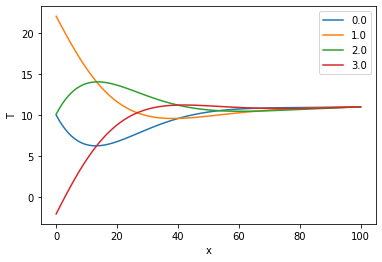

In [24]:
#TPC
from __future__ import division, print_function
from pylab import *

A = 10
B = 12
tau = 365
D = 0.1
def T0(t):
	return A + B*sin(2*pi*t/tau)

L = 20     # Thickness of steel in meters
D = 0.1   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 0.01     # Time-step
#epsilon = h/1000

T = zeros(N+1,float)
T[1:N]=10


def iterate(T,t_min,t_max):
	# Main loop
	t = t_min
	c = h*D/a**2

	while t<t_max:
	
	    # Calculate the new values of T
		T[0] = T0(t)
		T[N] = 11
		T[1:N] = T[1:N] + c*(T[2:N+1]+T[0:N-1]-2*T[1:N])
	    
		#T,Tp = Tp,T
		t += h
	return T


T9 = iterate(T,0,365*9)

T9_i = T9
t_min = 365*9
for t_max in [365*9 + i*(365//4) for i in range(4)]:
	#t_max = t_min + 365//4
	T9_i = iterate(T9_i,t_min,t_max)
	plot(T9_i,label=t_max%365/(365//4))
	t_min = t_max

legend()
xlabel("x")
ylabel("T")
show()